# Linear Regression

## Building a Linear Regression Algorithm from Scratch

The purpose of machine learning is to create a model, that given an input is able to predict the output. The simplest model that we can fit to data is a straight line. Trying to find a line that fits a set of data is called **Linear Regression**, e.g. if we were to plot house prices vs square footage, can we predict the price given it's size?

If we plotted weights against heights of a set of professional baseball players:
![Scatter Plot 1](img/scatter-plot-1.png)

If we were to draw a line to best fit the data:
![Scatter plot 2](img/scatter-plot-2.png)

Now, if we wanted to estimate the weight of a player with a height of 73 inches, we could estimate that it is around 143 pounds. A line allows us the ability to explain and predict variables that have a linear relationship with each other. We're looking for the best fit.

A line is determined by its slope(a measure of how steep the line is) and its intercept(a measure of where the line hits the y-axis). For each point y on a line we can say:

```py
y = mx + b
```

 - `y` is the point on the y-axis
 - `m` is the slope
 - `b` is the intercept
 - `x` is the point on the x-axis

You calculate the predicted values of `y`, given the values of `x`, `m` and `b`. Then plot the `predicted y-values` vs x and see how close the line is to fitting the data.

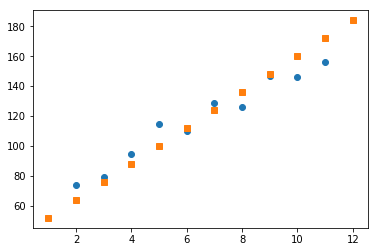

In [5]:
import matplotlib.pyplot as plt
months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
revenue = [52, 74, 79, 95, 115, 110, 129, 126, 147, 146, 156, 184]

#slope:
m = 12
#intercept:
b = 40
plt.plot(months, revenue, "o")

# caluculate y values given x-values, slope and intercept
y = [m * months + b for months in months]
plt.plot(months, y, 's')

# change the m and  b values so the line fits the data

## Loss

When we think about how we can assign a slope and intercept to fit a set of points, we have to define what the best fit is. For each data point, we calculate loss(or error), a number that measures how bad the model's (in this case, the line's) prediction was.
It's the squared distance (instead of just the distance) so that points above and below the line both contribute to total loss:

![Loss](img/loss.png)

For point A, the squared distance is 9 (3²). For point B, the squared distance is 1 (1²). The totla loss for this model is `10`.  If we found a line that had less loss than 10, that line would be a better model for this data.

In [7]:
# calculate line of best fit
x = [1, 2, 3]
y = [5, 1, 3]

#y = x
m1 = 1
b1 = 0
# predict the values of y, based on the values m1, b and x
y_predicted1 = [m1 * x_value + b1 for x_value in x]
print(y_predicted1)

#y = 0.5x + 1
m2 = 0.5
b2 = 1
y_predicted2 = [m2 * x_value + b2 for x_value in x]

total_loss1 = 0

# find the sum of the squared distance between the actual y-values of the points and the y_predicted1 values
for i in range(len(y)):
  total_loss1 += (y[i] - y_predicted1[i]) ** 2

total_loss2 = 0
for i in range(len(y)):
  total_loss2 += (y[i] - y_predicted2[i]) ** 2

print(total_loss1)
print(total_loss2) # best fit, smallest loss


[1, 2, 3]
17
13.5


The goal of a linear regression model is to find the slope and intercept pair (`b` and `m` values) that minimizes loss on average across all of the data using `Gradient Descent`.

## Gradient Descent for Intercept

As we try to minimize loss, we take each parameter we are changing(`m` - slope, and `b` - intercept), and move it as long as we are decreasing loss. The process by which we do this is called gradient descent. We move in the direction(which can involve either decreasing/increasing the parameter) that decreases our loss the most. Gradient refers to the slope of the curve at any point.

Let's say we are trying to find the intercept for a line. We currently have a guess of 10 for the intercept. At the point of 10 on the curve, the slope is downward. Therefore, if we increase the intercept, we should be lowering the loss. So we follow the gradient downwards.

![Linear regression](img/linear-regression.gif)

To derive the gradient at various points we:

1. find the sum of `y_value - (m * x_value + b)` for all `y_values` and `x-values`.

2. multiply the sum by a factor of `-2/N`, where `N` is the number of points.

We can derive the gradient of `b` at each point using this formula:

```py
# x - x values, y - y values, b - slope, b - intercept
# following the formula: gradient = y - (m * x + b)
# N number of points
def get_gradient_at_b(x, y, m, b):
  diff = 0
  N = len(x)
  for i in range(0, len(x)):
    y_val = y[i]
    x_val = x[i]
    diff += y_val - (m * x_val + b)
    
  b_gradient = -2/N * diff  
  return b_gradient
```

## Gradient Descent for Slope

To find the gradient of `m` at each point:

1. find the sum of `x_value * (y_value - (m * x_value + b))` for all `x_values` and `y_values`.

2. multiply the sum by a factor of `-2/N` where `N` is the number of points

```py
def get_gradient_at_m(x, y, b, m):
  N = len(x)
  diff = 0
  for i in range(N):
      x_val = x[i]
      y_val = y[i]
      diff += x_val * (y_val - ((m * x_val) + b))

m_gradient = -(2/N) * diff  
return m_gradient
```

Once we have a way to calculate both the m gradient and the b gradient, we'll be able to follow both of those gradients downwards to the point of lowest loss for both the m value and the b value. Then, we'll have the best m and the best b to fit our data!

When calculating the gradient, we want to take small steps otherwise we will 'overshoot' the minimum error. We can scale the size of the step by multiplying the gradient by a `learning rate`. Thus to find a new `b` value we would:

```py
new_b = current_b - (learning_rate * b_gradient)
```

Where `current_b` is our guess for what the `b` value is, `b_gradient` is the gradient of the loss curve at our current guess, and `learning_rate` is proportional to the size of the step we want to take.

We can put it all together and create a formula to calculate the `step gradient`:


```py
def step_gradient(x, y, b_current, m_current):
  b_gradient = get_gradient_at_b(x, y, b_current, m_current)
  m_gradient = get_gradient_at_m(x, y, b_current, m_current)
  b = b_current - (0.01 * b_gradient)
  m = m_current - (0.01 * m_gradient)
  return [b, m]
```

In [ ]:
# Example bringing it all togther
def get_gradient_at_b(x, y, b, m):
  N = len(x)
  diff = 0
  for i in range(N):
    x_val = x[i]
    y_val = y[i]
    diff += (y_val - ((m * x_val) + b))
  b_gradient = -(2/N) * diff  
  return b_gradient

def get_gradient_at_m(x, y, b, m):
  N = len(x)
  diff = 0
  for i in range(N):
      x_val = x[i]
      y_val = y[i]
      diff += x_val * (y_val - ((m * x_val) + b))
  m_gradient = -(2/N) * diff  
  return m_gradient

def step_gradient(x, y, b_current, m_current):
  b_gradient = get_gradient_at_b(x, y, b_current, m_current)
  m_gradient = get_gradient_at_m(x, y, b_current, m_current)
  b = b_current - (0.01 * b_gradient)
  m = m_current - (0.01 * m_gradient)
  return (b, m)

# sales data
months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
revenue = [52, 74, 79, 95, 115, 110, 129, 126, 147, 146, 156, 184]

# current intercept guess:
b = 0
# current slope guess:
m = 0

# update b and m
b, m = step_gradient(months, revenue, b, m)

print(b, m)

## Convergence

How do we know when we should stop changing the parameters m and b? Or when our 'program' has learned enough?

When the loss stops changing (or changes very slowly) when parameters are changed - the point of **Convergence**. Hopefully, the algorithm will converge at the best values for the parameters m and b. The linear regression algorithm stops when the parameters stop changing (or change very slowly).

From the plot below we can see that it tock apprx. 800 iterations to reach convergence, a `b` value of 47.

![Convergence](img/convergence.png)

If the algorithm is taking too long to converge, should you move the learning rate up. Gradient descent is already being performed in steps that are too small, and lowering the learning rate would only make the steps smaller.

## Learning Rate

We want our program to be able to iteratively learn what the best `m` and `b` values are. So for each `m` and `b` pair that we guess, we want to move them in the direction of the gradients we've calculated. But how far do we move in that direction?

We have to choose a learning rate, which will determine how far down the loss curve we go.

To small and it will take too long to converge — you might run out of time or cycles before getting an answer. A large learning rate might skip over the best value, never converging.

![Converge](img/linear-regression-2.gif)

Finding the absolute best learning rate is not necessary for training a model. You just have to find a learning rate large enough that gradient descent converges with the efficiency you need, and not so large that convergence never happens.

## Puting it all together!

At each step, we know how to calculate the gradient and move in that direction with a step size proportional to our learning rate. Now, we want to make these steps until we reach convergence.

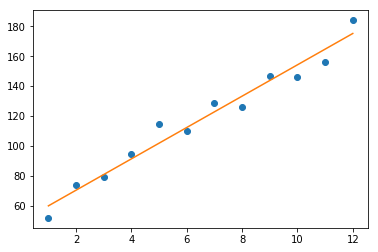

In [6]:
import matplotlib.pyplot as plt

def get_gradient_at_b(x, y, b, m):
  N = len(x)
  diff = 0
  for i in range(N):
    x_val = x[i]
    y_val = y[i]
    diff += (y_val - ((m * x_val) + b))
  b_gradient = -(2/N) * diff  
  return b_gradient

def get_gradient_at_m(x, y, b, m):
  N = len(x)
  diff = 0
  for i in range(N):
      x_val = x[i]
      y_val = y[i]
      diff += x_val * (y_val - ((m * x_val) + b))
  m_gradient = -(2/N) * diff  
  return m_gradient

# updated step_gradient function, added 'learning_rate'
def step_gradient(b_current, m_current, x, y, learning_rate):
    b_gradient = get_gradient_at_b(x, y, b_current, m_current)
    m_gradient = get_gradient_at_m(x, y, b_current, m_current)
    b = b_current - (learning_rate * b_gradient)
    m = m_current - (learning_rate * m_gradient)
    return [b, m]
  
# gradient_descent function
def gradient_descent(x, y, learning_rate, num_iterations):
  b= 0
  m = 0
  for i in range(num_iterations):
    b, m = step_gradient(b, m, x, y, learning_rate)
    
  return (b, m)


# Example ===================================================
months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
revenue = [52, 74, 79, 95, 115, 110, 129, 126, 147, 146, 156, 184]

# calculate the 'best' intercept and slope (b and m) for the data sets
b, m = gradient_descent(months, revenue, 0.01, 1000)

# plot the line
y = [m*x + b for x in months]
plt.plot(months, revenue, "o")
plt.plot(months, y)

#### Example 2

```py
from gradient_descent_funcs import gradient_descent
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("heights.csv")

X = df["height"]
y = df["weight"]

plt.plot(X, y, 'o')

# calculate every value of y for x, b and m
b, m = gradient_descent(X, y, 0.0001, 1000)
y_predictions = [i * m + b for i in X]

# plot y_predictions vs x values
plt.plot(X, y_predictions)
plt.show()
```

![Scatter plot](img/scatter-plot-3.png)

The goal of a linear regression algorithm is to find the intercept and slope that minimize average loss - produce the line of best fit.